# Symbolic solutions of MacKay's "burglar alarm" example

Taken from Chapter 21 of the late David MacKay's classic book, [Information Theory, Inference, and Learning Algorithms](http://www.inference.phy.cam.ac.uk/itila/book.html).

> Example 21.1. Fred lives in Los Angeles and commutes 60 miles to work. Whilst at work, he receives a phone-call from his neighbour saying that Fred’s burglar alarm is ringing. What is the probability that there was a burglar in his house today? While driving home to investigate, Fred hears on the radio that there was a small earthquake that day near his home. ‘Oh’, he says, feeling relieved, ‘it was probably the earthquake that set off the alarm’. What is the probability that there was a burglar in his house? (After Pearl, 1988).

> Let’s introduce variables b (a burglar was present in Fred’s house today), a (the alarm is ringing), p (Fred receives a phonecall from the neighbour reporting the alarm), e (a small earthquake took place today near Fred’s house), and r (the radio report of earthquake is heard by Fred). 


In [1]:
from sympy import *
init_session()

from sympy.stats import P, E, variance, Die, Normal
from sympy import Eq, simplify, stats
import sympy.stats


IPython console for SymPy 1.0 (Python 3.6.0-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


# Is a coin biased?

The illuminating examples provided in Wikipedia's [Bayes Factor](https://en.wikipedia.org/wiki/Bayes_factor) page:

> Suppose we have a random variable that produces either a success or a failure. We want to compare a model M1 where the probability of success is q = ½, and another model M2 where q is unknown and we take a prior distribution for q that is uniform on [0,1]. We take a sample of 200, and find 115 successes and 85 failures.


# First method - Bayes model comparison

Model M1 is a fair coin. Model M2 is a coin with an unknown bias $q$ (there is no need to say $q \ne 1/2$). We compute the Bayes factor as follows, indicating data as $x$ for brevity. It's one of those few cases in which computations is easier without taking logarithms. We also assume priors for M1 and M2 to be equal.

$$ {P(M1|x)\over P(M2|x)} = {P(x|M1) \over P(x|M2)} $$

$$ P(x|M1)= {S+F \choose S} 2^{-(S+F)} $$

We assume the prior over $q$ for M2 to be constant between 0 and 1.

$$ P(x|M2)=\int_0^1 {S+F \choose S}  q^S (1-q)^F  dq $$ 

In [29]:
S=115
F=85

s,f,q=symbols("s f q",real=True)

sf = [(s,S),(f,F)] # Shorthand

P_x_M1 = binomial(s+f,s)*2**(-s-f)

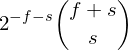

In [13]:
P_x_M1

In [30]:
P_x_M1.subs(sf).evalf()

In [24]:
P_x_M2_q = binomial(s+f,s) * q**s * (1-q)**f
P_x_M2 = integrate(P_x_M2_q,(q,0,1)).simplify()

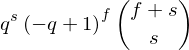

In [25]:
P_x_M2_q

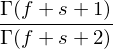

In [26]:
# Scary looking, but actually a Beta
P_x_M2

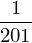

In [34]:
P_x_M2.subs(sf)

In [35]:
(P_x_M1/P_x_M2).subs(sf).evalf()

Answer: **barely worth mentioning** in favour of M1 (balance).

# Second method: frequentist hypothesis testing

Compute how many combinations there are for which the imbalance between $|s-f|$ is equal or more "extreme" than the $|S-F|$ observed (S+F is given).

In [39]:
pval=2*summation(binomial(S+F,s),(s,S,S+F)) / 2**(S+F)

In [40]:
pval.evalf()

So, the frequentist approach indicates evidence in favour against the null hypothesis (imbalance).

# Inferences on *q*

The Bayesian point of view does *not* concern with a specific value of $q$, but rather with its a posteriori distribution (e.g. its credibility interval). We have a certain number of approaches to extract $q$ nevertheless.

* Maximum likelihood
* Median of $P(q|x)$
* Mean of $P(q|x)$


## Maximum likelihood

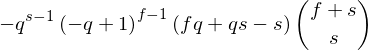

In [45]:
D_P_x_M2_q=P_x_M2_q.diff(q).simplify()
D_P_x_M2_q

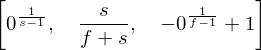

In [46]:
solve(D_P_x_M2_q,q)

In [64]:
solve(D_P_x_M2_q,q)[1].subs(sf)

In [65]:
solve(D_P_x_M2_q,q)[1].subs(sf).evalf()

## Median a posteriori

In [51]:
Int_P_x_M2_q=integrate(P_x_M2_q,(q,0,x)).simplify()
# Then solve Int_P_x_M2_q==1/2  , which seems not trivial

## Mean a posteriori

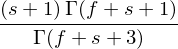

In [58]:
mean_P_x_M2_q = integrate(q*P_x_M2_q,(q,0,1)).simplify()
mean_P_x_M2_q

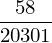

In [61]:
mean_P_x_M2_q.subs(sf)

In [62]:
mean_P_x_M2_q.subs(sf).evalf()

# Likelihood ratio test

We need to get the likelihood of M2 at the maximum value for $q$.